# DATASET과 DATALOADER 

### torch.utils.data.DataLoader / torch.utils.data.Dataset 의 두 가지 데이터 기본 요소를 제공
- Dataset은 샘플과 label(정답)을 저장
- DataLoader은 Dataset을 샘플에 쉽게 접근할 수 있도록 반복 가능한 객체로 감싼다. 

## 데이터셋 불러오기 

### TorchVision에서 Fashion-MNIST 데이터셋을 불러오는 예제
   - 6만개의 학습 데이터와 1만개의 테스트 데이터
   - 흑백의 28x28 이미지, 10개의 클래스 

### Fashion-MNIST 불러오기 
   - root는 학습/테스트 데이터가 저장되는 경로 
   - train은 학습/테스트 데이터셋 여부 설정
   - download = True 는 root에 데이터가 없는 경우 인터넷에서 다운 
   - transform과 target_transform 은 feature과 label, transform을 지정

In [5]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

training_data = datasets.FashionMNIST(
    root = "data",
    train = True,
    download=True,
    transform = ToTensor()
)

test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform = ToTensor()
)


26422272it [00:04, 5557307.15it/s]                              
Extracting data\FashionMNIST\raw\train-images-idx3-ubyte.gz to data\FashionMNIST\raw

29696it [00:00, 108180.03it/s]                          
Extracting data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to data\FashionMNIST\raw

4422656it [00:02, 1922205.52it/s]                            
Extracting data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to data\FashionMNIST\raw

6144it [00:00, 6165024.83it/s]          
d:\sources\GitRepository\Pytorch_tutorial\venv\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\cs

# 데이터셋을 반복하고 시각화하기 
- Dataset 에 리스트 처럼 직접 접근(index) 할 수 있다. 
- train_data 를 matplotlib로 일부를 시각화 

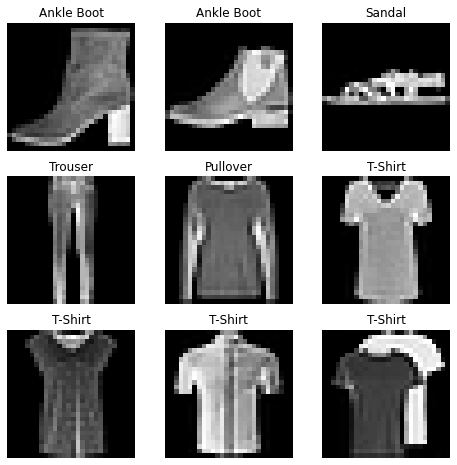

In [11]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize = (8,8))

for i in range(1, 10):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(3, 3, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")

plt.show()

# 파일에서 사용자 정의 데이터셋 만들기 
- 사용자 정의 Dataset 클래스는 반드시 3개의 함수를 구현해야함 
- ____init____     : Dataset 객체가 생성될 때 한번만 실행 // 이미지와 주석파일이 포함된 디렉토리와 두가지 transform을 초기화
- ____len____      : 함수의 데이터셋의 샘플 개수를 반환 
- ____getitem____  : 주어진 인덱스 idx에 해당하는 샘플을 데이터셋에서 불러오고 반환 

In [13]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, trnasform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]

        if self.transform:
            image = self.transform(image)
        
        if self.target_transform:
            label = self.target_transform(label)
        
        return image, label

In [ ]:
# __getitem__ 추가 정리 : 